In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from matplotlib.colors import ListedColormap
plt.style.use("fivethirtyeight")

## Perceptron is only applicable only on linear separable datasets

In [59]:
class Perceptron:
    def __init__(self,eta: float=None, epochs: int=None):  #eta ---> Learning rate
        self.weights = np.random.randn(3) * 1e-4  #small random weights, Why 3 becuase we have two columns x1,x2 and bias
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initail weights before training: \n {self.weights}")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, x_with_bias, weights):
        return np.dot(x_with_bias, weights)
    
    def activationfunction(self,z):
        return np.where(z > 0, 1, 0) # if z greter then zero return 1 else 0
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        x_with_bias = np.c_[self.X, -np.ones((len(self.X),1))]
        print(f"X with bias: \n {x_with_bias}")
        
        for epoch in range(self.epochs):
            print(f"for epoch >> {epoch}")
            
            z = self._z_outcome(x_with_bias,self.weights)
            y_hat = self.activationfunction(z)
            print(f"predicted value after farward pass {y_hat}")
            
            self.error = y - y_hat
            print(f"Error: \n {self.error}")
            
            #Updates The weight
            self.weights = self.weights + self.eta * np.dot(x_with_bias.T,self.error)
            print(f"Updated weights after epoch: {epoch + 1}/{self.epochs}:\n{self.weights}")
            print("##"*10)
            
            
    
    def predict(self,X): # Here X is a test input
        x_with_bias = np.c_[X, -np.ones((len(X),1))]
        z = self._z_outcome(x_with_bias,self.weights)
        return self.activationfunction(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"Total loss: {total_loss}")
        return total_loss
    
    def _create_dir_return_path(self,model_dir,filename):
        os.mkdir(model_dir)
        return os.path.join(model_dir,filename)
    
    
    def save(self,filename,model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)
    
    def load(self,filepath):
        return joblib.load(filepath)
    
        

In [60]:
def prepare_data(df,target_col="y"):
    X = df.drop(target_col,axis=1)
    y = df[target_col]
    return X,y

# Model for AND Gate

In [48]:
AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
   "y":[0,0,0,1]
}
df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


# Model for OR Gate

In [32]:
OR = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
   "y":  [0,1,1,1]
}
df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


# For AND Gate

In [61]:
X,y = prepare_data(df_AND)

ETA = 0.1
EPOCHS = 10

model_AND = Perceptron(eta = ETA, epochs = EPOCHS)
model_AND.fit(X,y)
_ = model_AND.total_loss()

initail weights before training: 
 [-1.99526384e-04 -6.65116636e-05  1.59036479e-04]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after farward pass [0 0 0 0]
Error: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 1/10:
[ 0.09980047  0.09993349 -0.09984096]
####################
for epoch >> 1
predicted value after farward pass [1 1 1 1]
Error: 
 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after epoch: 2/10:
[-1.99526384e-04 -6.65116636e-05  2.00159036e-01]
####################
for epoch >> 2
predicted value after farward pass [0 0 0 0]
Error: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 3/10:
[0.09980047 0.09993349 0.10015904]
####################
for epoch >> 3
predicted value after farward pass [0 0 0 1]
Error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 4/10:
[0.09980047 0.09993349 0.10015904]
##

# Save Model_AND


In [ ]:
model_AND.save(filename="AND.model")

# load The modelAND

In [63]:
reload_AND = Perceptron().load(filepath="model/AND.model")

In [54]:
reload_AND

# Prediction

In [64]:
reload_AND.predict(X = [[1,0]])

array([0])

# For OR gate

In [33]:
X,y = prepare_data(df_OR)

ETA = 0.1
EPOCHS = 10

model_AND = Perceptron(eta = ETA, epochs = EPOCHS)
model_AND.fit(X,y)
_ = model_AND.total_loss()

initail weights before training: 
 [ 3.36480763e-05  1.13829528e-04 -2.13704482e-05]
X with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch >> 0
predicted value after farward pass [1 1 1 1]
Error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/10:
[3.36480763e-05 1.13829528e-04 9.99786296e-02]
####################
for epoch >> 1
predicted value after farward pass [0 0 0 0]
Error: 
 0    0
1    1
2    1
3    1
Name: y, dtype: int64
Updated weights after epoch: 2/10:
[ 0.20003365  0.20011383 -0.20002137]
####################
for epoch >> 2
predicted value after farward pass [1 1 1 1]
Error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/10:
[ 0.20003365  0.20011383 -0.10002137]
####################
for epoch >> 3
predicted value after farward pass [1 1 1 1]
Error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 4/10:
[ 2.00033648e-01  2.00113830e-01 -2.1

# PLOTS

In [73]:
def save_plot(df,model,filename="plot.png",plot_dir="plots"):
    def create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100 , cmap = "coolwarm")
        plt.axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
        plt.axvline(x=0, color = "black", linestyle = "--", linewidth = 1)
        figure = plt.gcf()
        figure.set_size_inches(10,8)
    
    def plot_decision_regions(X,y,classifier,resolusion=0.02):
        colors = ("cyan","lightgreen")
        cmap = ListedColormap(colors)
        X = X.values
        x1 = X[:,0]
        x2 = X[:,1]
        x1_min,x1_max = x1.min() - 1 , x1.max() + 1
        x2_min,x2_max = x2.min() - 1 , x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolusion),
                               np.arange(x2_min,x2_max,resolusion))
        
        y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1,xx2,y_hat,alpha=0.3, cmap = cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
    X,y = prepare_data(df)
    create_base_plot(df)
    plot_decision_regions(X,y,model)
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir,filename)
    
    plt.savefig(plot_path)

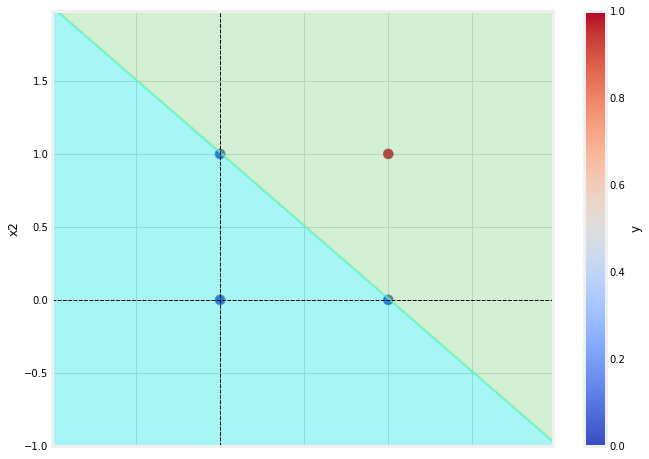

In [74]:
save_plot(df_AND,model_AND,filename="and.png")